In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dados

|Atributo|Descrição|
|-|-|
|Ordem|Coluna de ID|
|Valor|Valor do Imóvel|
|Area|Tamanho da área do imóvel|
|IA|Idade do Imóvel|
|Andar|Quantidade de Andares|
|Suites|Quanitdade de Suítes|
|Vista|Se o imóvel possui uma boa vista ou não|
|DistBM|Distância do imóvel do mar|
|Semruido|Se o imóvel é localizado em uma região calma ou não|
|AV100m|Distante ou próximo à área verde|

In [2]:
imoveis = pd.read_csv('dados/Valorizacao_Ambiental.csv', sep=';')

In [3]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [4]:
imoveis.shape

(172, 10)

In [5]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [6]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


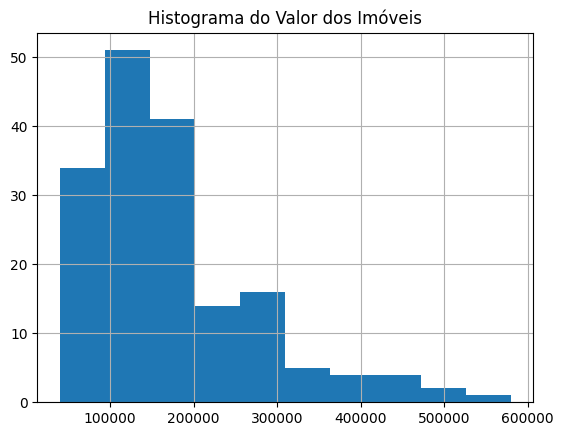

In [7]:
imoveis['Valor'].hist()

plt.title('Histograma do Valor dos Imóveis')
plt.show()

In [8]:
imoveis['Raiz Valor'] = np.sqrt(imoveis['Valor'])

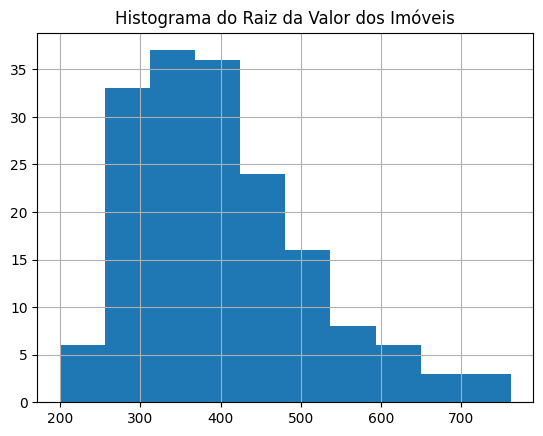

In [9]:
imoveis['Raiz Valor'].hist()

plt.title('Histograma do Raiz da Valor dos Imóveis')
plt.show()

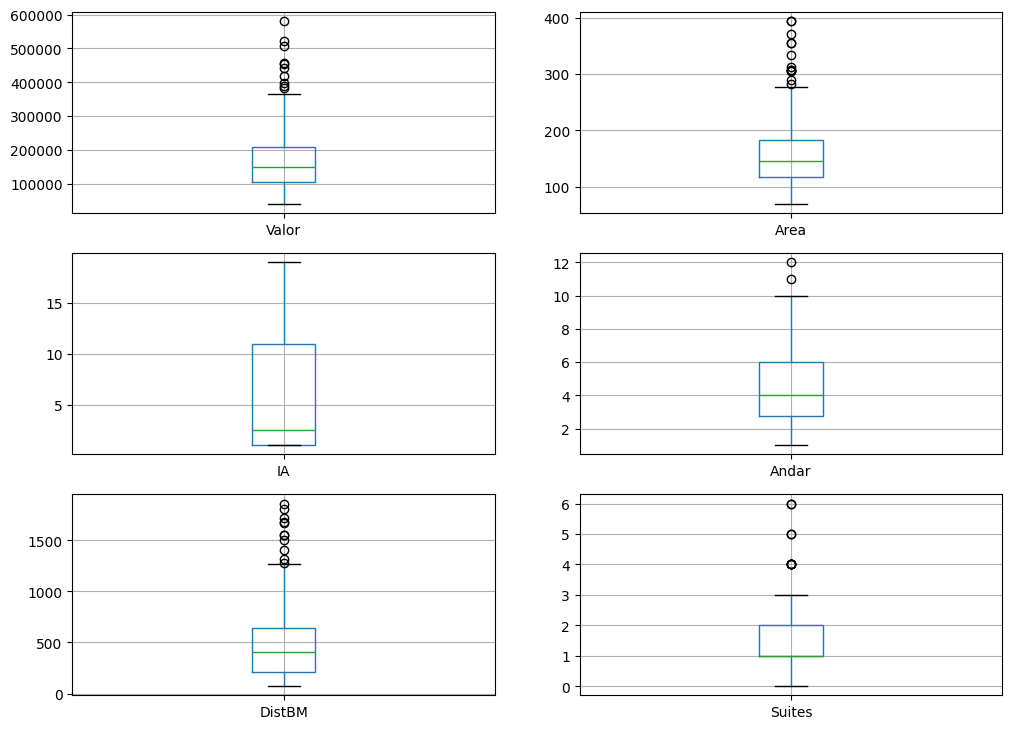

In [10]:
plt.figure(figsize=(12,12))

plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column = 'Valor')

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column = 'Area')

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column = 'IA')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column = 'Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column = 'DistBM')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column = 'Suites')

plt.show()

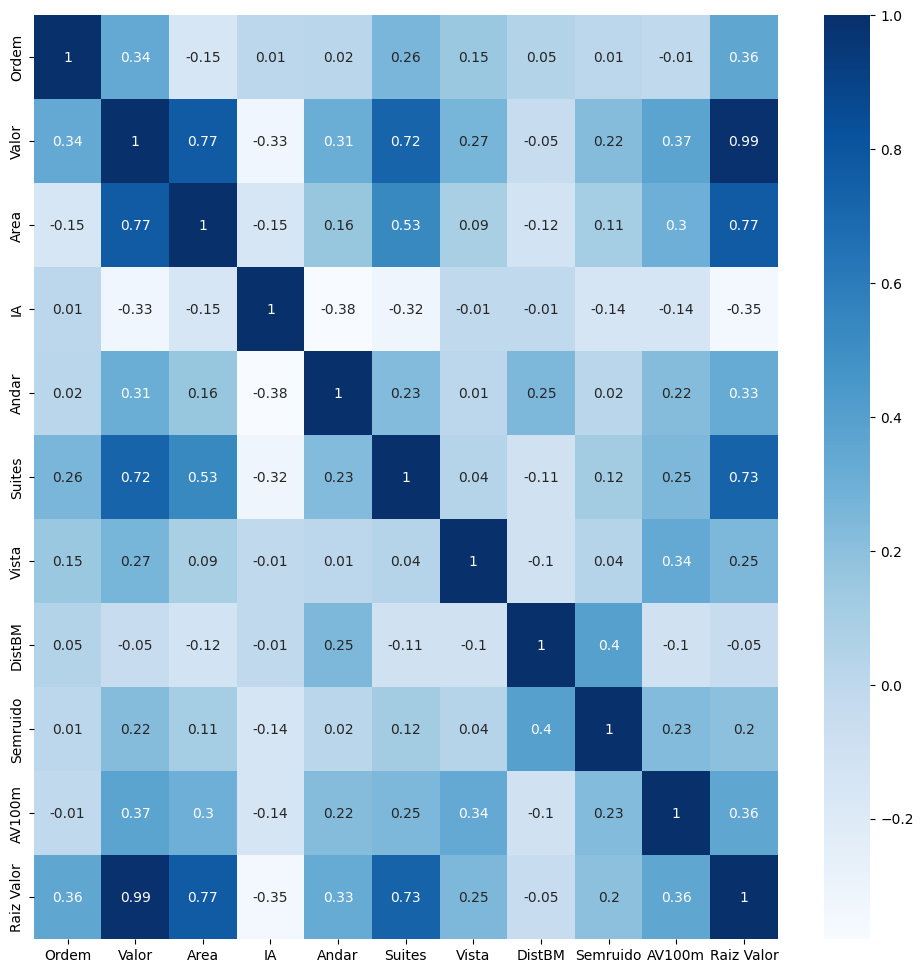

In [11]:
corr_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(data=corr_matrix, annot=True, cmap='Blues', ax=ax)

plt.show()

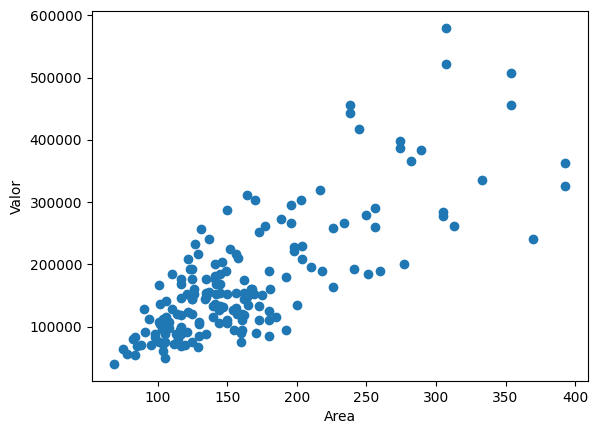

In [12]:
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel('Area')
plt.ylabel('Valor')
plt.show()

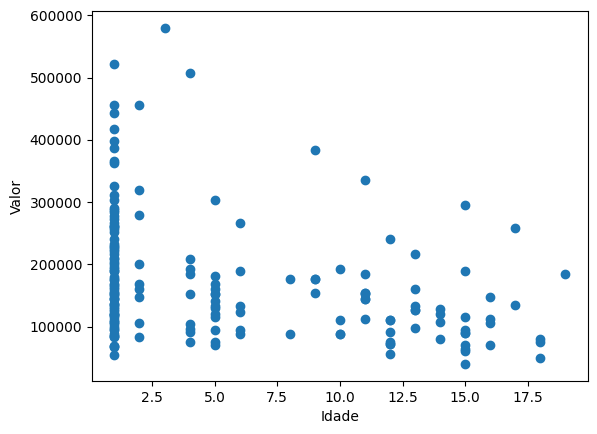

In [13]:
plt.scatter('IA', 'Valor', data=imoveis)
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.show()

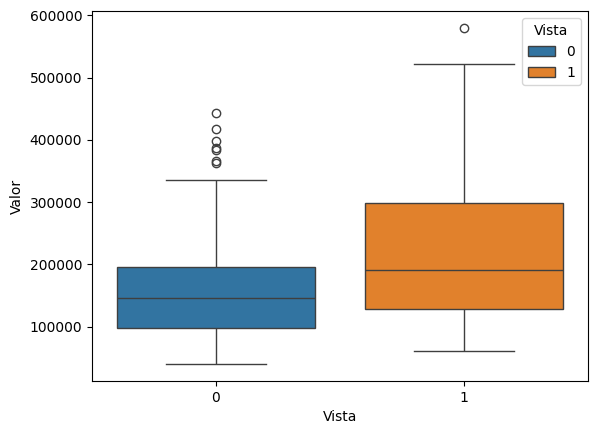

In [14]:
sns.boxplot(x='Vista', y='Valor', data=imoveis, hue='Vista')
plt.show()

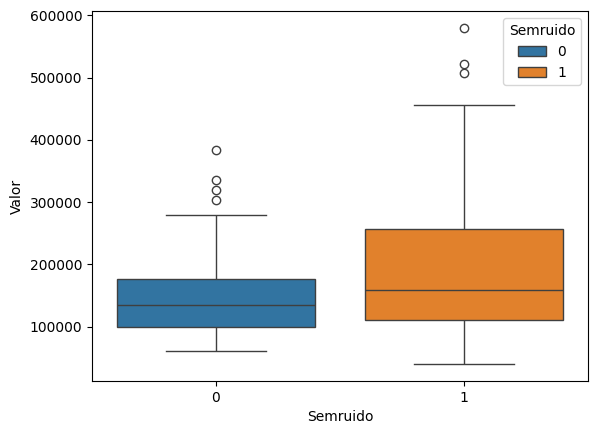

In [15]:
sns.boxplot(x='Semruido', y='Valor', data=imoveis, hue='Semruido')
plt.show()

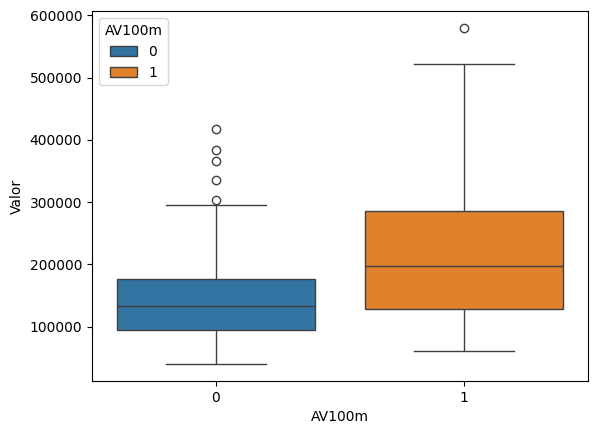

In [16]:
sns.boxplot(x='AV100m', y='Valor', data=imoveis, hue='AV100m')
plt.show()

In [18]:
lr = LinearRegression()

In [20]:
X = imoveis[['Area', 'Suites', 'IA', 'Semruido',
             'Vista', 'Andar', 'AV100m', 'DistBM']]

y = imoveis['Valor']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=101)

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
print('Intercepto: ', lr.intercept_)

Intercepto:  -40165.87527730182


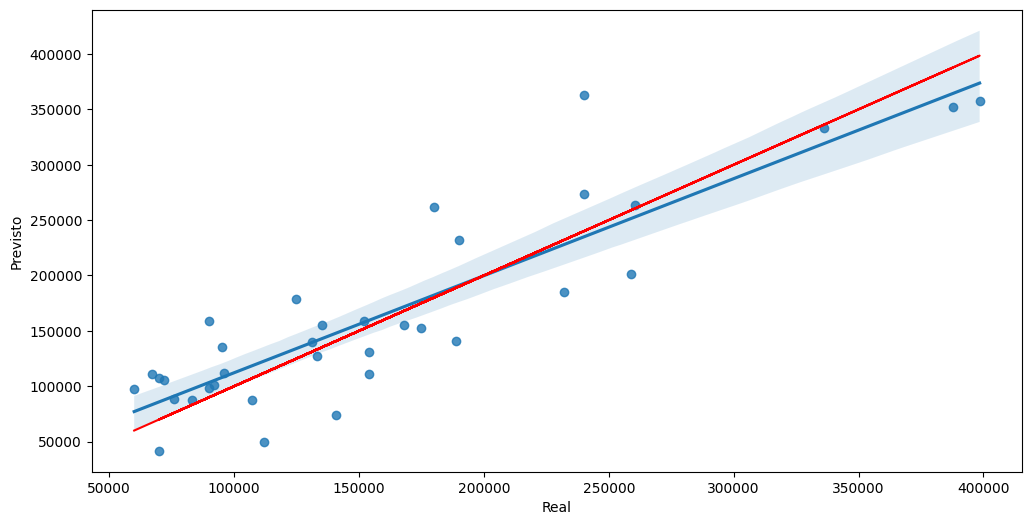

In [30]:
fig = plt.figure(figsize=(12,6))
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='Real', ylabel='Previsto')
ax = plt.plot(y_test, y_test, 'r')
plt.show()